# Input/Output

In this section, we introduce how to input and output proxy data with `cfr`.

`cfr` provides a useful class called `ProxyDatabase` to conveniently store a collection of proxy records.
Each record is stored in the form of a class called `ProxyRecord`.
Here, we take the PAGES 2k global multiproxy database ([PAGES2k Consortium, 2017](https://doi.org/10.1038/sdata.2017.88)) as an example to illustrate the basic usage of these two classes regarding data input/output.

Essentially, `cfr` supports below conversions:

- `pandas.DataFrame` <=> `cfr.ProxyDatabase`
- a netCDF file <=> `cfr.ProxyDatabase`
- a netCDF file <=> `cfr.ProxyRecord`

In addition, `cfr` supports **remote loading** of hosted databases.

Required data to complete this tutorial:

- PAGES2k Phase 2 database: [pages2k_updated_Palmyra_dataset.pkl](https://github.com/fzhu2e/cfr/raw/main/docsrc/notebooks/data/pages2k_updated_Palmyra_dataset.pkl)

In [2]:
# import the packages we need for this tutorial
%load_ext autoreload
%autoreload 2

import cfr
print(cfr.__version__)
import xarray as xr

## Remote loading databases

`cfr` supports remote loading of hosted databases, currently including PAGES2kv2 and pseudoPAGES2k.

By calling the `.fetch()` method of `ProxyDatabase` without any arguments, a list of supported database names will be listed:

In [3]:
pdb = cfr.ProxyDatabase().fetch()

>>> Choose one from the supported databases:
- PAGES2kv2
- pseudoPAGES2k/ppwn_SNRinf_rta
- pseudoPAGES2k/ppwn_SNR10_rta
- pseudoPAGES2k/ppwn_SNR2_rta
- pseudoPAGES2k/ppwn_SNR1_rta
- pseudoPAGES2k/ppwn_SNR0.5_rta
- pseudoPAGES2k/ppwn_SNR0.25_rta
- pseudoPAGES2k/ppwn_SNRinf_fta
- pseudoPAGES2k/ppwn_SNR10_fta
- pseudoPAGES2k/ppwn_SNR2_fta
- pseudoPAGES2k/ppwn_SNR1_fta
- pseudoPAGES2k/ppwn_SNR0.5_fta
- pseudoPAGES2k/ppwn_SNR0.25_fta
- pseudoPAGES2k/tpwn_SNR10_rta
- pseudoPAGES2k/tpwn_SNR2_rta
- pseudoPAGES2k/tpwn_SNR1_rta
- pseudoPAGES2k/tpwn_SNR0.5_rta
- pseudoPAGES2k/tpwn_SNR0.25_rta
- pseudoPAGES2k/tpwn_SNR10_fta
- pseudoPAGES2k/tpwn_SNR2_fta
- pseudoPAGES2k/tpwn_SNR1_fta
- pseudoPAGES2k/tpwn_SNR0.5_fta
- pseudoPAGES2k/tpwn_SNR0.25_fta


### Remote loading PAGES2k

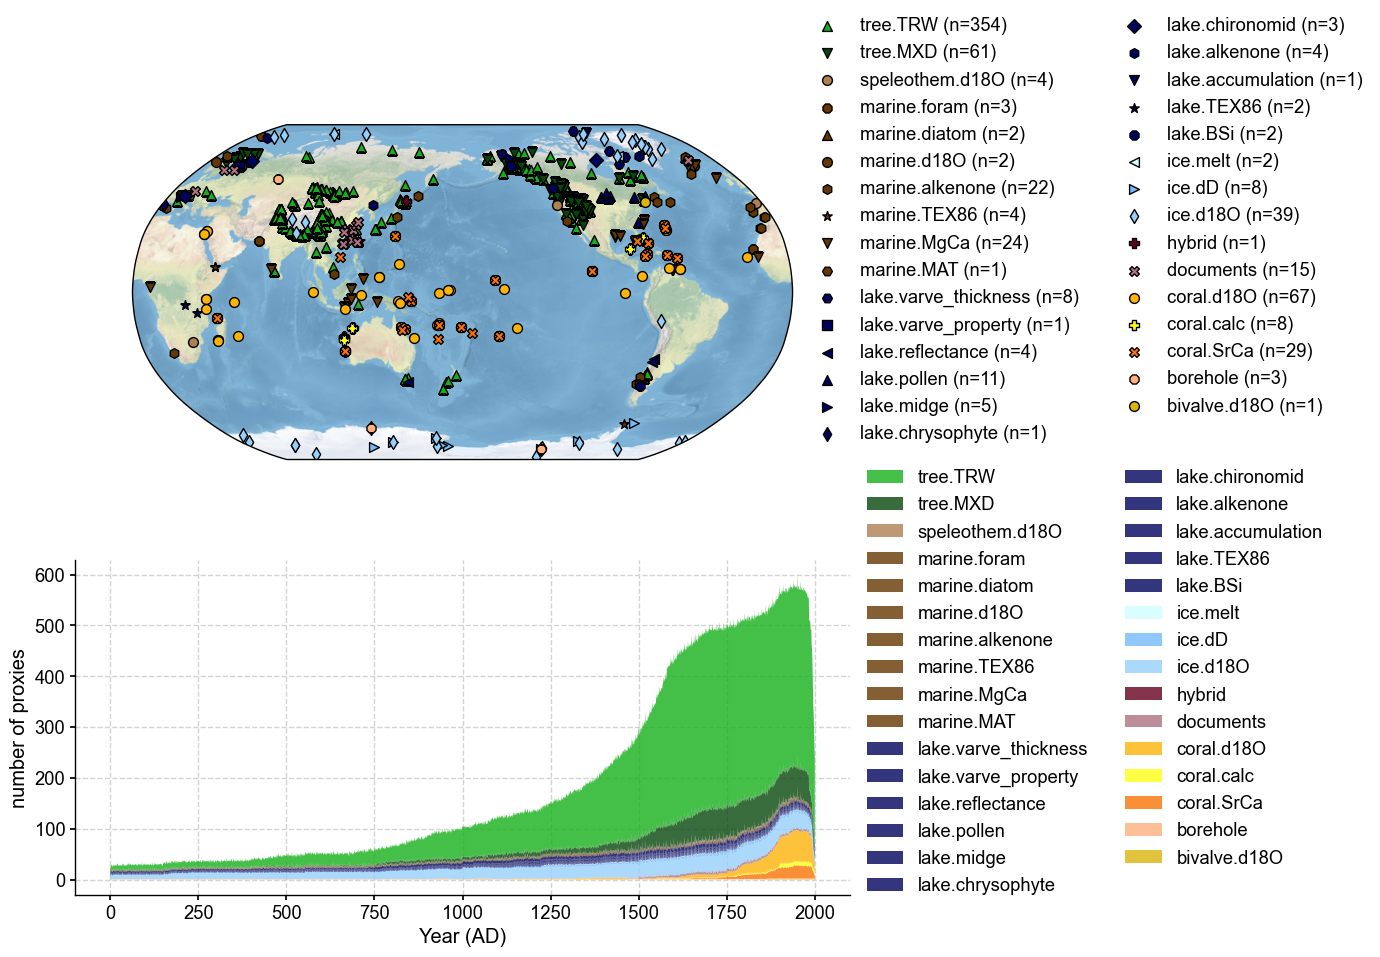

In [4]:
pdb = cfr.ProxyDatabase().fetch('PAGES2kv2')
fig, ax = pdb.plot(plot_count=True)

### Remote loading pseudoPAGES2k

Note that there are different versions of pseudoPAEGS2k, such as "ppwn_SNRinf_rta" and "tpwn_SNR10_fta".
Those version names should be appended after "pseudoPAEGS2k/".
We show two examples below:

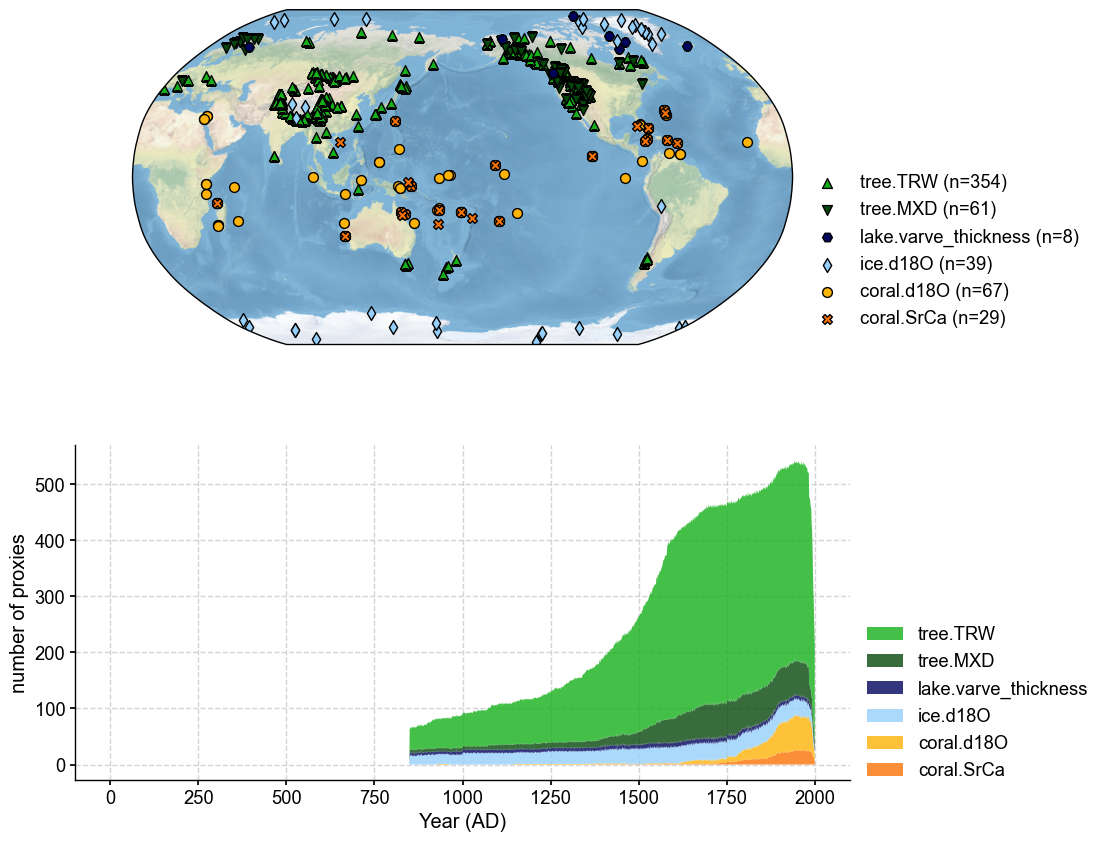

In [5]:
pdb = cfr.ProxyDatabase().fetch('pseudoPAGES2k/ppwn_SNRinf_rta')
fig, ax = pdb.plot(plot_count=True)

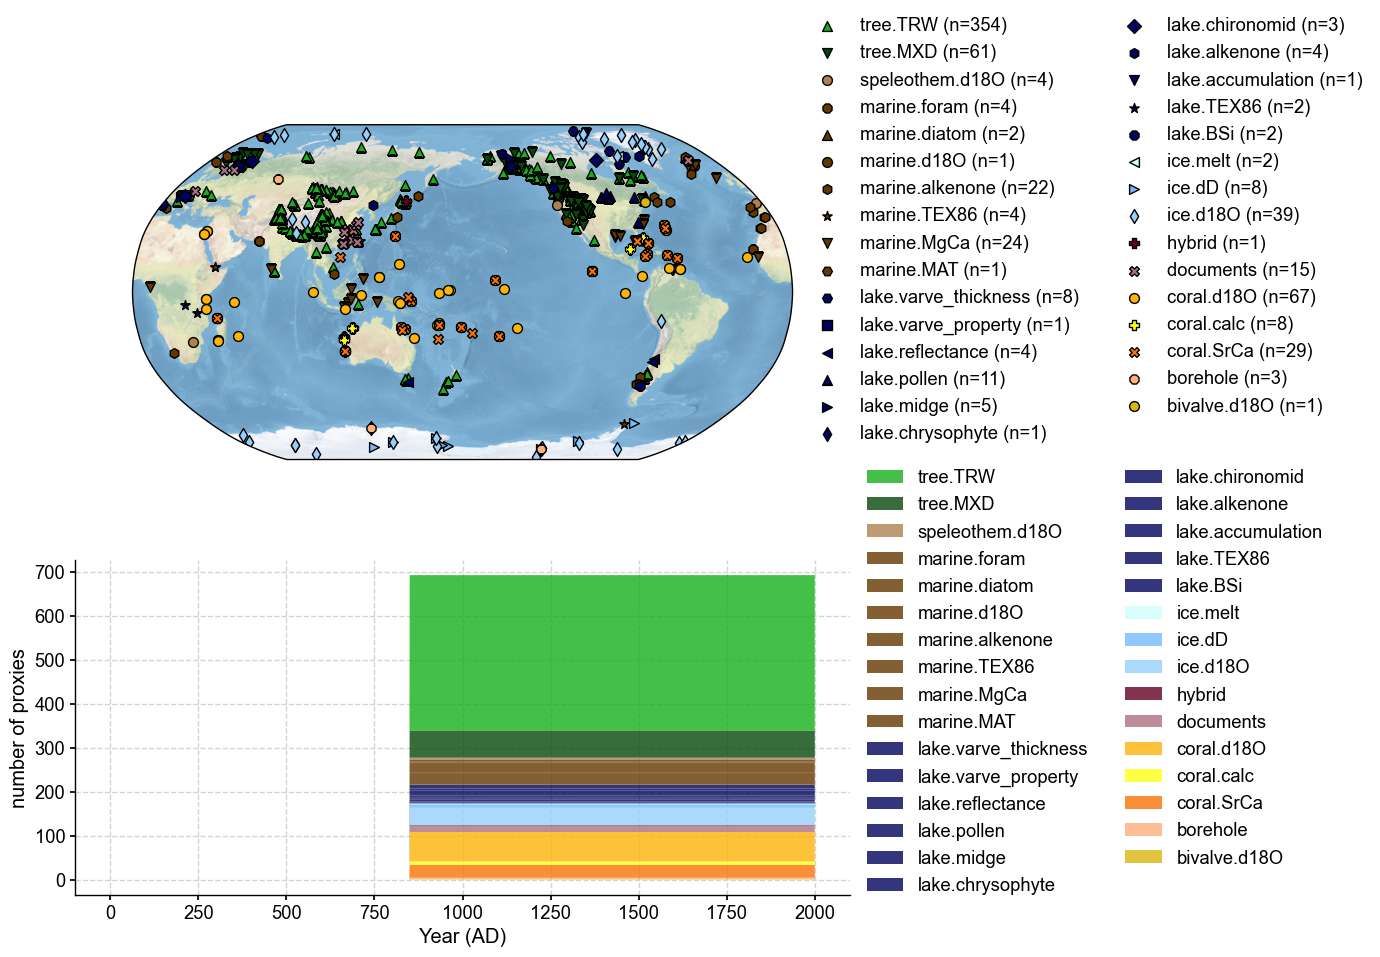

In [6]:
pdb = cfr.ProxyDatabase().fetch('pseudoPAGES2k/tpwn_SNR10_fta')
fig, ax = pdb.plot(plot_count=True)

## `cfr.ProxyDatabase` => `pandas.DataFrame`

Any `cfr.ProxyDatabase` can be converted to a `pandas.DataFrame`.

In [12]:
df = pdb.to_df()
df

pid    lat     lon  elev                 ptype  \
0    NAm_153   52.7   241.7  None              tree.TRW   
1    Asi_245   23.0   114.0  None             documents   
2    NAm_165   37.9   252.3  None              tree.MXD   
3    Asi_178  28.77   83.73  None              tree.TRW   
4    Asi_174  28.18   85.43  None              tree.TRW   
..       ...    ...     ...   ...                   ...   
687  Asi_201  35.88   74.18  None              tree.TRW   
688  Asi_179   27.5   88.02  None              tree.TRW   
689  Arc_014  63.62    29.1  None  lake.varve_thickness   
690  Ocn_071   16.2  298.51  None            coral.d18O   
691  Ocn_072   16.2  298.51  None            coral.SrCa   

                                                  time  \
0    [850.0, 851.0, 852.0, 853.0, 854.0, 855.0, 856...   
1    [850.0, 851.0, 852.0, 853.0, 854.0, 855.0, 856...   
2    [850.0, 851.0, 852.0, 853.0, 854.0, 855.0, 856...   
3    [850.0, 851.0, 852.0, 853.0, 854.0, 855.0, 856...   
4    [850.0, 851.0, 852.0, 853.0, 854.0, 855.0, 856...   
..                                                 ...   
687  [850.0, 851.0, 852.0, 853.0, 854.0, 855.0, 856...   
688  [850.0, 851.0, 852.0, 853.0, 854.0, 855.0, 856...   
689  [850.0, 851.0, 852.0, 853.0, 854.0, 855.0, 856...   
690  [850.0, 851.0, 852.0, 853.0, 854.0, 855.0, 856...   
691  [850.0, 851.0, 852.0, 853.0, 854.0, 855.0, 856...   

                                                 value  
0    [0.8828125, 1.03125, 1.0703125, 1.140625, 0.81...  
1    [3.15625, 1.640625, 1.296875, 0.984375, -0.187...  
2    [0.9765625, 1.03125, 1.0390625, 1.0390625, 0.9...  
3    [1.3828125, 1.1328125, 1.296875, 1.109375, 0.8...  
4    [1.3125, 1.1171875, 1.3125, 1.1484375, 0.77343...  
..                                                 ...  
687  [1.3203125, 1.203125, 1.53125, 0.96875, 0.7109...  
688  [1.3828125, 1.15625, 1.3203125, 1.140625, 0.82...  
689  [-1.046875, -0.7265625, -0.4765625, -1.2265625...  
690  [-3.9453125, -4.203125, -4.1640625, -3.84375, ...  
691  [8.9375, 8.875, 8.8828125, 8.96875, 8.953125, ...  

[692 rows x 7 columns]

## `pandas.DataFrame` => `cfr.ProxyDatabase`

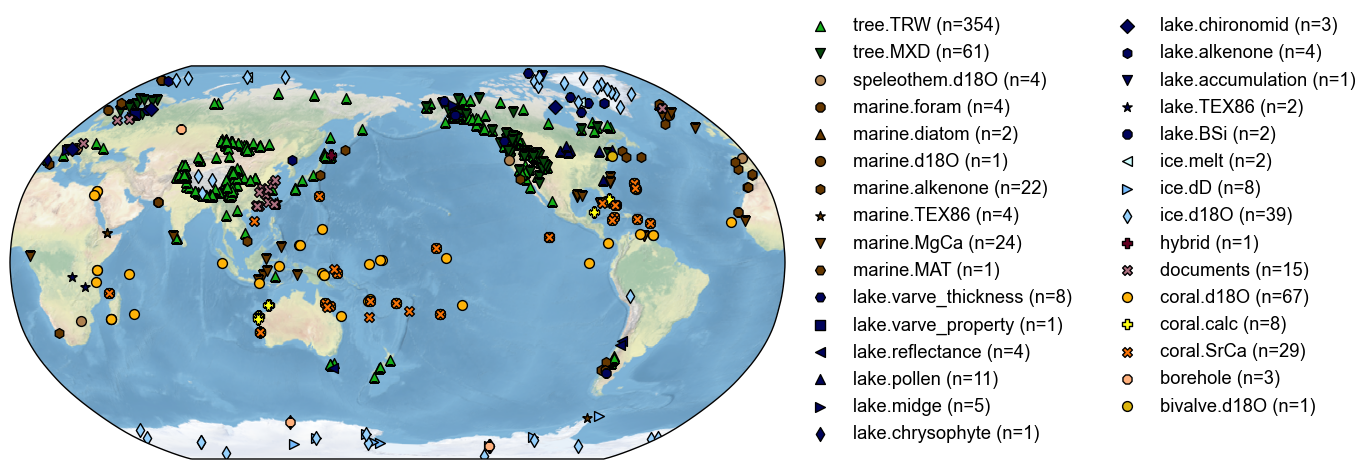

In [11]:
pdb = cfr.ProxyDatabase().from_df(
    df, pid_column='pid', lat_column='lat', lon_column='lon', elev_column='elev',
    time_column='time', value_column='value')
fig, ax = pdb.plot()  # plot to have a check

## `cfr.ProxyDatabase` => a netCDF file

Note that converting a `cfr.ProxyDatabase` to a netCDF file comes with the limitation that the time axis prior to 1 CE will be truncated since that is not supported yet.

In [14]:
pdb.to_nc('./data/PAGES2k.nc')

100%|██████████| 692/692 [00:12<00:00, 54.30it/s]


ProxyDatabase saved to: ./data/PAGES2k.nc


In [15]:
ds = xr.open_dataset('./data/PAGES2k.nc')
ds

/Users/fengzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/xarray/coding/times.py:710: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/fengzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


<xarray.Dataset>
Dimensions:  (time: 1156)
Coordinates:
  * time     (time) object 0850-01-01 00:00:00 ... 2005-01-01 00:00:00
Data variables: (12/692)
    NAm_153  (time) float64 ...
    Asi_245  (time) float64 ...
    NAm_165  (time) float64 ...
    Asi_178  (time) float64 ...
    Asi_174  (time) float64 ...
    Eur_016  (time) float64 ...
    ...       ...
    Ocn_169  (time) float64 ...
    Asi_201  (time) float64 ...
    Asi_179  (time) float64 ...
    Arc_014  (time) float64 ...
    Ocn_071  (time) float64 ...
    Ocn_072  (time) float64 ...

## a netCDF file => `cfr.ProxyDatabase`

Now we load the generated netCDF file into a `cfr.ProxyDatabase`.

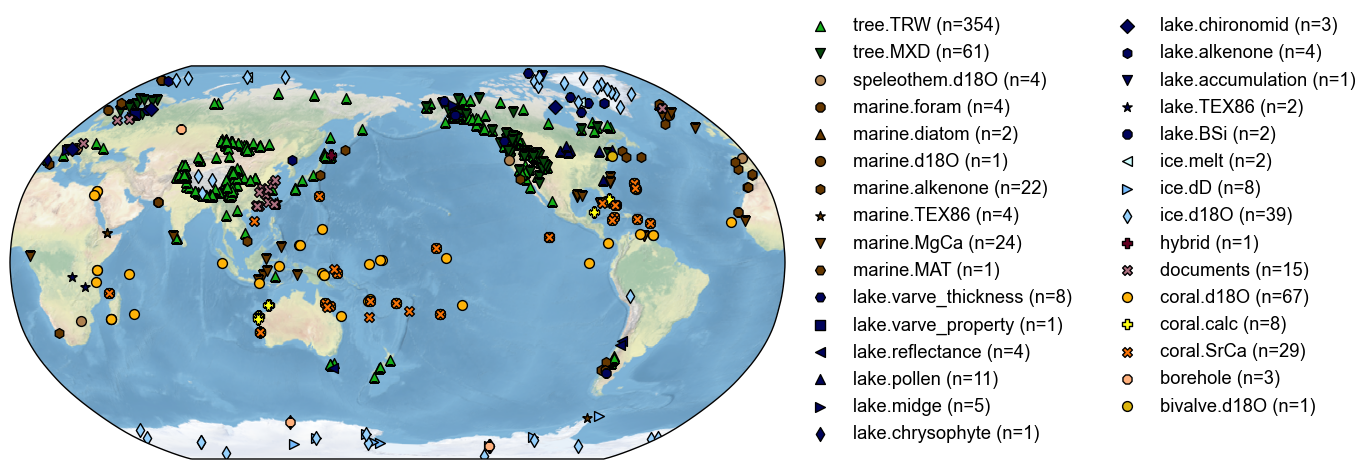

In [17]:
pdb = cfr.ProxyDatabase().load_nc('./data/PAGES2k.nc')
fig, ax = pdb.plot()  # plot to have a check

## `cfr.ProxyRecord` => a netCDF file

Each `cfr.ProxyRecord` can be saved to a netCDF file as well.

In [18]:
pdb.records['NAm_153'].to_nc('./data/NAm_153.nc')

ProxyRecord saved to: ./data/NAm_153.nc


## a netCDF file => `cfr.ProxyRecord`

Now we load the saved netCDF file to a `cfr.ProxyRecord`.

/Users/fengzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/xarray/coding/times.py:710: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/fengzhu/Apps/miniconda3/envs/cfr-env/lib/python3.9/site-packages/xarray/core/indexing.py:524: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


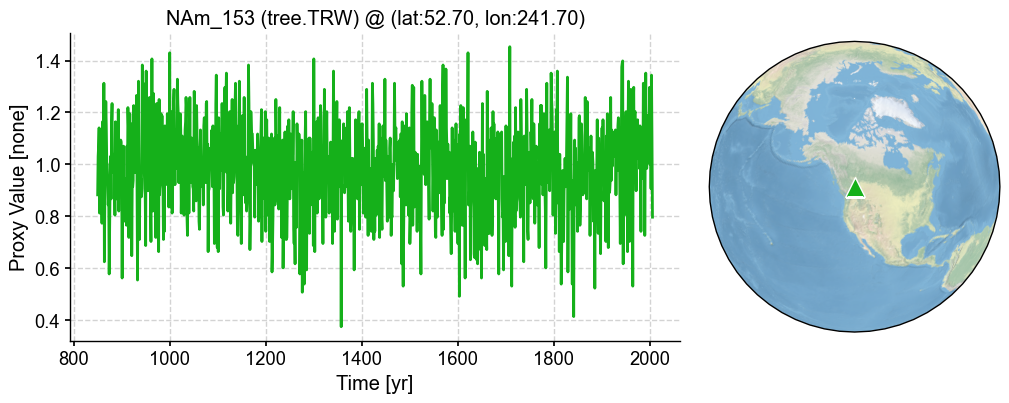

In [19]:
pobj = cfr.ProxyRecord().load_nc('./data/NAm_153.nc')
fig, ax = pobj.plot() # plot the record to have a check